<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML3_3_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Перцептрон


## Создание данных и их визуализация

In [ ]:
# импорт библиотек
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

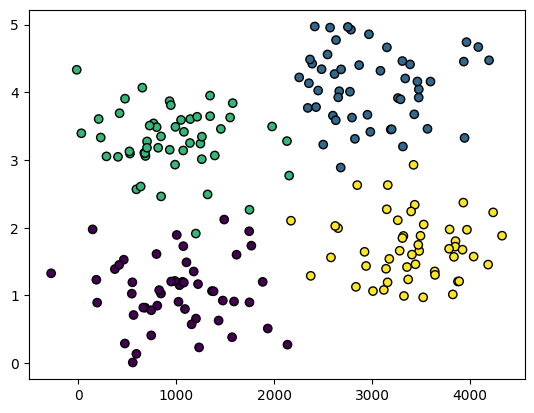

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

## Первая версия

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

In [ ]:
# для каждого слоя
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [ ]:
# по каждому нейрону отдельно
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [ ]:
# веса нейронов смещения
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


## Анализ модели

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # fit_transform используется на обучающей выборке


In [ ]:
# Матрица ошибок
print("Матрица ошибок:")
print(confusion_matrix(y, clf.predict(X)))


Матрица ошибок:
[[ 1  0  0 49]
 [ 0  0  0 50]
 [ 0  0  1 49]
 [ 0  0  0 50]]


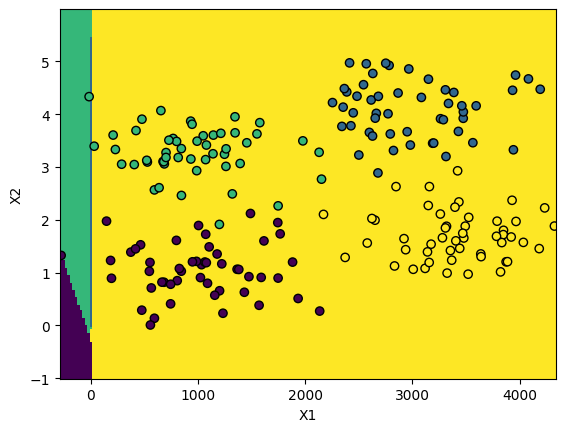

In [ ]:
# Создаем сетку для визуализации границ
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

# Прогнозируем значения на сетке и строим границу принятия решений
y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict, shading='auto')

# Визуализируем исходные точки
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## Объект нормализации данных

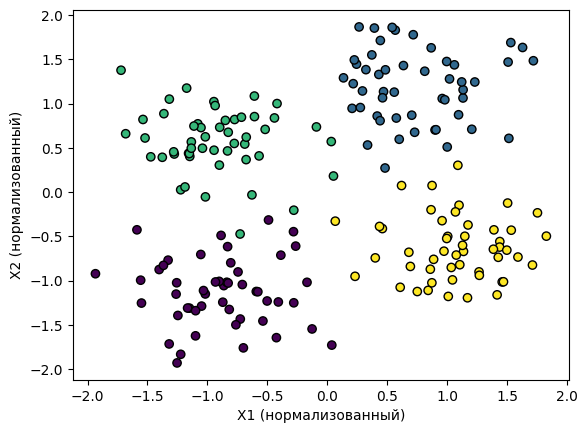

In [ ]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализируем нормализованные данные
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel("X1 (нормализованный)")
plt.ylabel("X2 (нормализованный)")
plt.show()


## Повторное обучение модели с увеличением лимита итераций

In [ ]:
# Переобучение
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)
# Больше итераций = меньше потерь

Iteration 1, loss = 1.57786775
Iteration 2, loss = 1.57447189
Iteration 3, loss = 1.57108269
Iteration 4, loss = 1.56770027
Iteration 5, loss = 1.56432475
Iteration 6, loss = 1.56095626
Iteration 7, loss = 1.55759733
Iteration 8, loss = 1.55424862
Iteration 9, loss = 1.55090412
Iteration 10, loss = 1.54756149
Iteration 11, loss = 1.54421658
Iteration 12, loss = 1.54088099
Iteration 13, loss = 1.53754817
Iteration 14, loss = 1.53421912
Iteration 15, loss = 1.53088839
Iteration 16, loss = 1.52755778
Iteration 17, loss = 1.52423356
Iteration 18, loss = 1.52090901
Iteration 19, loss = 1.51759302
Iteration 20, loss = 1.51428339
Iteration 21, loss = 1.51098026
Iteration 22, loss = 1.50768451
Iteration 23, loss = 1.50439738
Iteration 24, loss = 1.50111721
Iteration 25, loss = 1.49784405
Iteration 26, loss = 1.49457416
Iteration 27, loss = 1.49130551
Iteration 28, loss = 1.48804632
Iteration 29, loss = 1.48479345
Iteration 30, loss = 1.48154750
Iteration 31, loss = 1.47830850
Iteration 32, los

In [ ]:
# Выводим матрицу ошибок
print("Матрица ошибок после увеличения итераций:")
print(confusion_matrix(y, clf.predict(X)))


Матрица ошибок после увеличения итераций:
[[ 1 49  0  0]
 [ 0 50  0  0]
 [ 0 49  1  0]
 [ 0 50  0  0]]


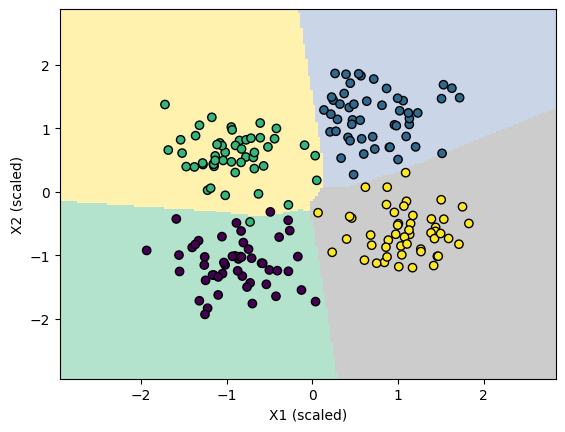

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем сетку для визуализации решений
X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

# Прогнозируем классы по сетке
y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

# Визуализация
plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='Pastel2', shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1, cmap='viridis')
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()


## Обучение модели с несколькими слоями

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

In [ ]:
# Выводим матрицу ошибок для модели с тремя скрытыми слоями
print("Матрица ошибок для модели с тремя скрытыми слоями:")
print(confusion_matrix(y, clf.predict(X_scaled)))

Матрица ошибок для модели с тремя скрытыми слоями:
[[49  0  1  0]
 [ 0 49  0  1]
 [ 1  0 49  0]
 [ 0  1  0 49]]


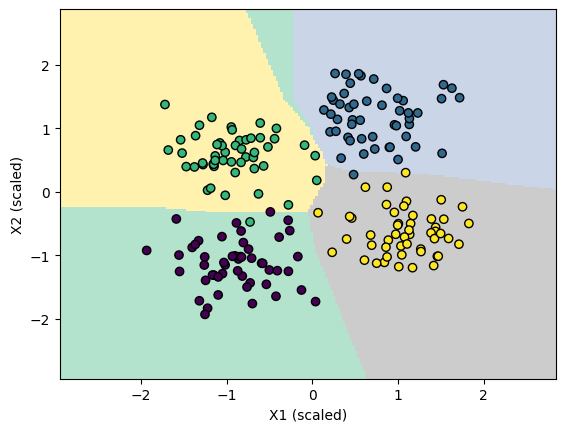

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем сетку для визуализации решений
X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

# Прогнозируем классы по сетке
y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

# Визуализация
plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='Pastel2', shading='auto')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1, cmap='viridis')
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()


# Задания для самостоятельного выполнения

## 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10000, random_state=1).fit(X_scaled, y)
print("Матрица ошибок для модели с 1 нейроном:")
print(confusion_matrix(y, clf.predict(X_scaled)))

Матрица ошибок для модели с 1 нейроном:
[[ 0  0 50  0]
 [ 0  0 50  0]
 [ 0  0 50  0]
 [ 0  0 50  0]]


Судя по матрице ошибок, модель с одним нейроном не справляется с задачей и присваивает все точки одному классу.

## 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import numpy as np


In [ ]:
# Создаем набор данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)

# Применяем масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Модель с двумя скрытыми слоями по 6 нейронов в каждом
clf_2_layers = MLPClassifier(hidden_layer_sizes=(6, 6), max_iter=10000, random_state=1)
clf_2_layers.fit(X_scaled, y)

# Предсказания и точность
y_pred_2_layers = clf_2_layers.predict(X_scaled)
accuracy_2_layers = accuracy_score(y, y_pred_2_layers)
print("Точность модели с двумя скрытыми слоями:", accuracy_2_layers)
print("Матрица ошибок для модели с двумя скрытыми слоями:")
print(confusion_matrix(y, y_pred_2_layers))


Точность модели с двумя скрытыми слоями: 0.99
Матрица ошибок для модели с двумя скрытыми слоями:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  1 48  0]
 [ 0  0  0 50]]


In [ ]:
# Модель с тремя скрытыми слоями по 6 нейронов в каждом
clf_3_layers = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10000, random_state=1)
clf_3_layers.fit(X_scaled, y)

# Предсказания и точность
y_pred_3_layers = clf_3_layers.predict(X_scaled)
accuracy_3_layers = accuracy_score(y, y_pred_3_layers)
print("Точность модели с тремя скрытыми слоями:", accuracy_3_layers)
print("Матрица ошибок для модели с тремя скрытыми слоями:")
print(confusion_matrix(y, y_pred_3_layers))


Точность модели с тремя скрытыми слоями: 0.985
Матрица ошибок для модели с тремя скрытыми слоями:
[[49  0  1  0]
 [ 0 49  0  1]
 [ 1  0 49  0]
 [ 0  0  0 50]]


In [ ]:
# Модель с десятью скрытыми слоями по 6 нейронов в каждом
clf_10_layers = MLPClassifier(hidden_layer_sizes=(6,) * 10, max_iter=10000, random_state=1)
clf_10_layers.fit(X_scaled, y)

# Предсказания и точность
y_pred_10_layers = clf_10_layers.predict(X_scaled)
accuracy_10_layers = accuracy_score(y, y_pred_10_layers)
print("Точность модели с десятью скрытыми слоями:", accuracy_10_layers)
print("Матрица ошибок для модели с десятью скрытыми слоями:")
print(confusion_matrix(y, y_pred_10_layers))


Точность модели с десятью скрытыми слоями: 0.75
Матрица ошибок для модели с десятью скрытыми слоями:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1 49  0  0]
 [ 0  0  0 50]]


Для данной задачи оптимальным выбором являются два или три скрытых слоя. Модель с десятью слоями переусложнена и ухудшает обобщающую способность на простом наборе данных, из-за чего ее производительность снижается.

## 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [ ]:
# Глубокая модель с десятью скрытыми слоями по 6 нейронов
clf_deep = MLPClassifier(hidden_layer_sizes=(6,) * 10, max_iter=10000, random_state=1)
clf_deep.fit(X_scaled, y)


MLPClassifier(hidden_layer_sizes=(6, 6, 6, 6, 6, 6, 6, 6, 6, 6), max_iter=10000,
              random_state=1)

In [ ]:
# Вывод весов всех нейронов на каждом слое
for i in range(len(clf_deep.coefs_)):
    print(f"Веса между слоем {i} и слоем {i + 1}:")
    print(clf_deep.coefs_[i])
    print()


Веса между слоем 0 и слоем 1:
[[-0.60626932  0.18062916 -0.69112334 -0.53681688 -0.75203401 -0.68505481]
 [-0.63505387 -0.57803899 -0.63933485 -0.13992729 -0.46889741  0.79686234]]

Веса между слоем 1 и слоем 2:
[[-0.43294849 -0.01469277  0.07483603  0.87674608  0.10423674  0.63733661]
 [ 0.84886085  0.77591573 -0.22102108 -0.19782122 -0.26245014  0.63624154]
 [-0.71116396  0.27918988  0.21995841  0.37101016  0.688886    0.07472082]
 [-0.00464833  0.49878215 -0.24567133  0.73440923  0.81074278  0.16893574]
 [-0.51084986  0.74815649 -0.15769524  0.32840944  0.94305087 -0.00752235]
 [-0.80498954 -0.79615175 -0.24245089  0.27261586 -0.72746787 -0.73240075]]

Веса между слоем 2 и слоем 3:
[[-6.98098269e-01 -2.79337092e-01 -1.06601442e-02 -2.16296321e-01
  -8.89470471e-01 -8.46693596e-02]
 [-2.93445326e-01  2.69209590e-01  7.92694189e-01  3.10194739e-02
   9.89940007e-01 -1.09701564e+00]
 [-1.21765560e-01  7.91726868e-02 -6.70530214e-04 -1.01859058e-01
   1.88276461e-01  1.36325509e-03]
 [ 

In [ ]:
# Вывод весов смещения для каждого слоя
for i in range(len(clf_deep.intercepts_)):
    print(f"Вектор весов смещения для слоя {i + 1}:")
    print(clf_deep.intercepts_[i])
    print()  # Пустая строка для разделения вывода слоев


Вектор весов смещения для слоя 1:
[-0.29827085  0.58254576 -0.80558221  0.29390955 -0.2053024   0.34374588]

Вектор весов смещения для слоя 2:
[-0.07533372 -0.38024246  0.08078346 -0.15208778  0.09718154  0.19408109]

Вектор весов смещения для слоя 3:
[ 0.76254098  0.39327606 -0.85058283  0.11312551 -0.33415793  0.38035356]

Вектор весов смещения для слоя 4:
[ 0.50715874  0.52649734  0.02166225 -0.51412995 -0.87153767 -0.51796074]

Вектор весов смещения для слоя 5:
[ 0.18344826 -0.1873047   0.73600953 -0.98913643 -0.33896564  0.42841809]

Вектор весов смещения для слоя 6:
[-0.52184927  0.17634316 -0.24418433  1.01567337  0.50006136  0.92997532]

Вектор весов смещения для слоя 7:
[ 0.50082398 -0.68182859  0.55661107  0.22507207 -0.21226924  0.105207  ]

Вектор весов смещения для слоя 8:
[ 0.01731989 -0.28806254  0.26841446 -0.14850128  0.7846989   0.64027535]

Вектор весов смещения для слоя 9:
[ 0.35117478 -0.85404067  0.3761702   0.39226043 -0.22622199 -0.34355589]

Вектор весов смещен

## 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [ ]:
import time


In [ ]:
# Генерация данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, centers=blob_centers, cluster_std=0.5, random_state=0)
X[:, 0] *= 1000

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Определение моделей
models = {
    "1 скрытый слой, 6 нейронов": MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=1),
    "5 скрытых слоев, 6 нейронов": MLPClassifier(hidden_layer_sizes=(6,) * 5, max_iter=10000, random_state=1),
    "10 скрытых слоев, 6 нейронов": MLPClassifier(hidden_layer_sizes=(6,) * 10, max_iter=10000, random_state=1)
}

# Словарь для хранения времени обучения и точности
results = {}

# Обучение и оценка моделей
for model_name, model in models.items():
    start_time = time.time()  # Запуск таймера
    model.fit(X_scaled, y)  # Обучение модели
    training_time = time.time() - start_time  # Время обучения

    accuracy = model.score(X_scaled, y)  # Точность модели
    results[model_name] = {
        "training_time": training_time,
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y, model.predict(X_scaled))
    }

# Вывод результатов
for model_name, metrics in results.items():
    print(f"Модель: {model_name}")
    print(f"Время обучения: {metrics['training_time']:.4f} секунд")
    print(f"Точность: {metrics['accuracy']:.4f}")
    print(f"Матрица ошибок:\n{metrics['confusion_matrix']}\n")


Модель: 1 скрытый слой, 6 нейронов
Время обучения: 0.7383 секунд
Точность: 0.9650
Матрица ошибок:
[[50  0  0  0]
 [ 0 49  0  1]
 [ 2  3 45  0]
 [ 0  1  0 49]]

Модель: 5 скрытых слоев, 6 нейронов
Время обучения: 2.2098 секунд
Точность: 0.9900
Матрица ошибок:
[[49  0  1  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]]

Модель: 10 скрытых слоев, 6 нейронов
Время обучения: 2.7201 секунд
Точность: 0.7500
Матрица ошибок:
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1 49  0  0]
 [ 0  0  0 50]]



Более сложные модели требуют больше времени на обучение, но это не всегда приводит к улучшению точности.

## 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
from sklearn.datasets import load_iris


In [ ]:
# Загрузка набора данных Iris
iris = load_iris()
X, y = iris.data, iris.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Создание и обучение модели перцептрона
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=1)
start_time = time.time()
clf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Оценка модели
accuracy = clf.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, clf.predict(X_test_scaled))

# Вывод результатов
print(f"Время обучения: {training_time:.4f} секунд")
print(f"Точность: {accuracy:.4f}")
print(f"Матрица ошибок:\n{conf_matrix}")


Время обучения: 0.7111 секунд
Точность: 0.9667
Матрица ошибок:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


## 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Загрузка набора данных о домах в Калифорнии
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Создание и обучение модели регрессии
regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=10000, random_state=1)
start_time = time.time()
regressor.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Оценка модели
y_pred = regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Вывод результатов
print(f"Время обучения: {training_time:.4f} секунд")
print(f"Среднеквадратичная ошибка: {mse:.4f}")

Время обучения: 9.4761 секунд
Среднеквадратичная ошибка: 0.3319


# Контрольные вопросы по нейронным сетям

## 1. Что называют глубокой нейронной сетью?
Глубокая нейронная сеть (ГНС) — это тип нейронной сети, которая содержит множество скрытых слоев между входным и выходным слоями. Количество слоев в такой сети обычно превышает три, что позволяет модели эффективно извлекать сложные иерархические признаки из входных данных. ГНС применяются в задачах, требующих сложной обработки данных, таких как обработка изображений, естественный язык и другие.

## 2. Что такое архитектура нейронной сети?
Архитектура нейронной сети описывает структуру сети, включая количество слоев, типы слоев (например, полносвязные, свёрточные, рекуррентные), количество нейронов в каждом слое и способ соединения между ними. Она определяет, как данные проходят через модель и как происходит обучение на данных.

## 3. Как количество нейронов и слоев влияет на качество моделирования?
Количество нейронов и слоев в нейронной сети влияет на её способность моделировать данные:
- **Слои**: Более глубокие сети (с большим количеством слоев) могут выявлять более сложные паттерны в данных, но также подвержены переобучению.
- **Нейроны**: Большее количество нейронов может повысить выразительность модели, но также увеличивает риск переобучения и усложняет обучение из-за роста вычислительной нагрузки. Идеальное количество нейронов и слоев зависит от задачи и объёма данных.

## 4. Как нейронная сеть решает задачи множественной классификации?
Нейронная сеть решает задачи множественной классификации, используя выходной слой с несколькими нейронами, соответствующими классам. Обычно применяют функцию активации softmax, которая преобразует выходы сети в вероятности принадлежности к каждому классу. На этапе обучения сеть минимизирует функцию потерь (например, кросс-энтропию) для корректной классификации.

## 5. В каких случаях следует применять перцептрон?
Перцептрон следует применять в случаях:
- Задач бинарной классификации, когда данные можно разделить линейно.
- Когда данные небольшие и не требуют сложных моделей.
- В качестве первого подхода для изучения работы нейронных сетей перед использованием более сложных архитектур. Перцептрон может служить базовой моделью для понимания принципов работы нейронных сетей и их обучения.


# Дополнительные задания

## 1. Повторите моделирование на одном из датасетов, но с использованием библиотек Tensoflow, PyTorch или Keras. Сравните результаты с реализацией перцептрона в библиотеке sklearn.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import warnings

In [ ]:
# Игнорировать предупреждения о сходимости
warnings.filterwarnings("ignore", category=UserWarning)

# Загрузка данных
data = load_iris()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель на scikit-learn
sklearn_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)
accuracy_sklearn = sklearn_model.score(X_test, y_test)
confusion_sklearn = confusion_matrix(y_test, y_pred_sklearn)

print(f"Точность модели на scikit-learn: {accuracy_sklearn:.2f}")
print("Матрица ошибок для scikit-learn:")
print(confusion_sklearn)

Точность модели на scikit-learn: 0.97
Матрица ошибок для scikit-learn:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [ ]:
# Модель на Keras
y_train_categorical = to_categorical(y_train)
keras_model = Sequential()
keras_model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
keras_model.add(Dense(3, activation='softmax'))  # 3 класса для Iris

keras_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.fit(X_train, y_train_categorical, epochs=100, batch_size=5, verbose=0)

# Оценка модели
loss, accuracy_keras = keras_model.evaluate(X_test, to_categorical(y_test), verbose=0)
print(f"Точность модели на Keras: {accuracy_keras:.2f}")

Точность модели на Keras: 0.97


Одинаковые показатели точности

## 2. Поэкспериментируйте с разными функциями активации и методами оптимизации. Найдите датасеты, на которых лучше работают разные функции активации и методы оптимизации.

In [ ]:
# Пример для Keras
from keras.datasets import mnist

# Загрузка MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0  # Нормализация
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0

# Эксперименты с различными функциями активации и оптимизаторами
activation_functions = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd', 'rmsprop']

for activation in activation_functions:
    for optimizer in optimizers:
        keras_model = Sequential()
        keras_model.add(Dense(128, activation=activation, input_shape=(X_train.shape[1],)))
        keras_model.add(Dense(10, activation='softmax'))

        keras_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        keras_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Оценка модели
        loss, accuracy = keras_model.evaluate(X_test, y_test, verbose=0)
        print(f"Функция активации: {activation}, Оптимизатор: {optimizer}, Точность: {accuracy}")


Функция активации: relu, Оптимизатор: adam, Точность: 0.9764999747276306
Функция активации: relu, Оптимизатор: sgd, Точность: 0.953000009059906
Функция активации: relu, Оптимизатор: rmsprop, Точность: 0.9768000245094299
Функция активации: sigmoid, Оптимизатор: adam, Точность: 0.9797000288963318
Функция активации: sigmoid, Оптимизатор: sgd, Точность: 0.9140999913215637
Функция активации: sigmoid, Оптимизатор: rmsprop, Точность: 0.9768000245094299
Функция активации: tanh, Оптимизатор: adam, Точность: 0.9747999906539917
Функция активации: tanh, Оптимизатор: sgd, Точность: 0.9431999921798706
Функция активации: tanh, Оптимизатор: rmsprop, Точность: 0.9781000018119812
